This notebook will try to understand directionality of DHS's in terms of the loops that they are involved in.

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import collections
import scipy
import scipy.stats
csv.register_dialect("textdialect", delimiter='\t')
HOME = "/home/raflynn/directionality"
! mkdir interm/nb2
%matplotlib inline

## Prepare DHS and looping data

In [194]:
dhs = pd.read_table("interm/nb1/160504_dhs_grodirec_sorted.bed", header=None)
dhs.head()

,0,1,2,3,4,5
0,chr1,3051710,3053710,chr1__3051710__3053710__3053055__DHSpeak_1__13...,2.711702,+
1,chr1,3332745,3334745,chr1__3332745__3334745__3333745__DHSpeak_2__12...,0.475715,-
2,chr1,3434895,3436895,chr1__3434895__3436895__3435895__DHSpeak_3__12...,0.000000,+
3,chr1,3472095,3474095,chr1__3472095__3474095__3473095__DHSpeak_4__11...,3.256955,-
4,chr1,3659925,3661925,chr1__3659925__3661925__3660925__DHSpeak_7__10...,inf,-


In [5]:
dhsdata = pd.read_table("interm/nb1/160504_dhs_grodirec_data.txt")
dhsdata.head()

,name,GROcomb_total,Startseq_total,GROcomb_direc,Startseq_direc
0,chr10__100050901__100052901__100051905__DHSpea...,2.676530,2.028329,-2.315269,-5.391503
1,chr10__100203865__100205865__100204865__DHSpea...,-inf,-inf,NaN,NaN
2,chr10__10040115__10042115__10041115__DHSpeak_6...,-3.458490,-2.259805,-inf,-inf
3,chr10__10074565__10076565__10075565__DHSpeak_6...,-inf,-inf,NaN,NaN
4,chr10__101044763__101046763__101045955__DHSpea...,-1.881533,-3.684404,-2.046448,5.052868


In [7]:
loops = pd.read_table("data/hichip/HiChIP_v65_merge_hiccups_default")
loops.head()

,chr1,x1,x2,chr2,y1,y2,color,binBL,binDonut,binH,...,expectedH,expectedV,fdrBL,fdrDonut,fdrH,fdrV,numCollapsed,observed,peak,radius
0,chr10,50620000,50630000,chr10,51740000,51750000,"0,255,255",0,1,0,...,1.140561,1.431510,0.000153,0.000035,0.000368,0.000037,1,14,3,25000
1,chr10,89540000,89545000,chr10,90150000,90155000,"0,255,255",2,2,4,...,2.597734,1.689074,0.000066,0.000061,0.005890,0.000097,1,15,3,22500
2,chr10,26095000,26100000,chr10,26610000,26615000,"0,255,255",3,5,4,...,3.127978,3.669037,0.000022,0.002948,0.000379,0.003214,1,17,4,22500
3,chr10,62545000,62550000,chr10,62595000,62600000,"0,255,255",3,6,3,...,2.407262,3.940076,0.000022,0.016392,0.000033,0.003214,1,17,3,22500
4,chr10,31460000,31470000,chr10,32610000,32620000,"0,255,255",3,4,4,...,2.678602,2.727523,0.000015,0.000404,0.000562,0.000412,1,17,5,25000


In [36]:
loops_samechr = loops[loops["chr1"] == loops["chr2"]]
loops_samechr_coll = pd.concat([loops_samechr["chr1"],
                                (loops_samechr["x1"] + loops_samechr["x2"])/2,
                                (loops_samechr["y1"] + loops_samechr["y2"])/2],
                               axis=1)
loops_samechr_coll[1] = loops_samechr_coll[1].astype(int)
loops_samechr_coll[2] = loops_samechr_coll[2].astype(int)
loops_samechr_coll.to_csv("interm/nb2/mES_hichip_loops_collapsed.bed", header=False, index=False, sep='\t')
! sort -k1,1 -k2,2n interm/nb2/mES_hichip_loops_collapsed.bed > interm/nb2/mES_hichip_loops_collapsed_sorted.bed
! head interm/nb2/mES_hichip_loops_collapsed_sorted.bed

chr1	4482500	4757500
chr1	4482500	5007500
chr1	4485000	19095000
chr1	4485000	19205000
chr1	5175000	5895000
chr1	5907500	6127500
chr1	6395000	6845000
chr1	7002500	7197500
chr1	7005000	7075000
chr1	7545000	7755000


In [40]:
! bedtools intersect -a interm/nb2/mES_hichip_loops_collapsed_sorted.bed \
-b interm/nb1/160504_dhs_grodirec_sorted.bed -wa -wb -sorted > interm/nb2/mES_loops_overlap_dhs.txt
! head interm/nb2/mES_loops_overlap_dhs.txt
! wc -l interm/nb2/mES_loops_overlap_dhs.txt

chr1	4482500	4757500	chr1	4480869	4482869	chr1__4480869__4482869__4481775__DHSpeak_19__10_Poised_Promoter__31	2.5582237840069735	-
chr1	4482500	4757500	chr1	4482017	4484017	chr1__4482017__4484017__4483095__DHSpeak_20__10_Poised_Promoter__765	inf	+
chr1	4482500	4757500	chr1	4482794	4484794	chr1__4482794__4484794__4483835__DHSpeak_21__11_Repressed__210	inf	-
chr1	4482500	4757500	chr1	4485834	4487834	chr1__4485834__4487834__4486805__DHSpeak_23__10_Poised_Promoter__589	0	+
chr1	4482500	4757500	chr1	4533493	4535493	chr1__4533493__4535493__4534225__DHSpeak_24__8_Strong_Enhancer__228	1.4625469561615498	-
chr1	4482500	4757500	chr1	4587645	4589645	chr1__4587645__4589645__4588645__DHSpeak_26__8_Strong_Enhancer__0	inf	-
chr1	4482500	4757500	chr1	4601105	4603105	chr1__4601105__4603105__4602105__DHSpeak_28__12_Heterochrom__0	inf	-
chr1	4482500	4757500	chr1	4649536	4651536	chr1__4649536__4651536__4650345__DHSpeak_29__12_Heterochrom__513	2.2300007453930761	-
chr1	4482500	5007500	chr1	4480869	4482869	

## Do loops have characteristic directionalities?

In [41]:
loop_to_dhs = collections.defaultdict(lambda: [])
with open("interm/nb2/mES_loops_overlap_dhs.txt", 'r') as ifile:
    reader = csv.reader(ifile, 'textdialect')
    for row in reader:
        loop = '__'.join(row[:3])
        loop_to_dhs[loop].append(row[3:])

In [175]:
all_num_plus = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_num_plus_sim = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_enh_plus = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_enh_plus_sim = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_prom_plus = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
all_prom_plus_sim = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["ratio", "total"])
num_counter = num_sim_counter = enh_counter = enh_sim_counter = prom_counter = prom_sim_counter = 0
for loop in loop_to_dhs:
    if counter % 1000 == 0: print counter
    dhs_list = loop_to_dhs[loop]
    num_plus = num_total = enh_plus = enh_total = prom_plus = prom_total = 0
    
    for dhs in dhs_list:
        if dhs[4] == '0': continue
        num_total += 1
        if dhs[5] == '+': num_plus += 1
        if 'enhancer' in dhs[3].lower(): 
            enh_total += 1
            if dhs[5] == '+': enh_plus += 1
        elif 'promoter' in dhs[3].lower(): 
            prom_total += 1
            if dhs[5] == '+': prom_plus += 1   
                
    if enh_total > 0:
        ratio = float(enh_plus)/enh_total
        ratio = np.max([ratio, 1 - ratio])
        all_enh_plus.ix[enh_counter,:] = [ratio, np.log2(enh_total)]
        enh_counter += 1

        num_plus_sim = np.random.binomial(enh_total, 0.5)
        sim_ratio = num_plus_sim/float(enh_total)
        sim_ratio = np.max([sim_ratio, 1 - sim_ratio])
        all_enh_plus_sim.ix[enh_sim_counter,:] = [sim_ratio, np.log2(enh_total)]
        enh_sim_counter += 1
        
    if prom_total > 0:
        ratio = float(prom_plus)/prom_total
        ratio = np.max([ratio, 1 - ratio])
        all_prom_plus.ix[prom_counter,:] = [ratio, np.log2(prom_total)]
        prom_counter += 1

        num_plus_sim = np.random.binomial(prom_total, 0.5)
        sim_ratio = num_plus_sim/float(prom_total)
        sim_ratio = np.max([sim_ratio, 1 - sim_ratio])
        all_prom_plus_sim.ix[prom_sim_counter,:] = [sim_ratio, np.log2(prom_total)]
        prom_sim_counter += 1        

5378


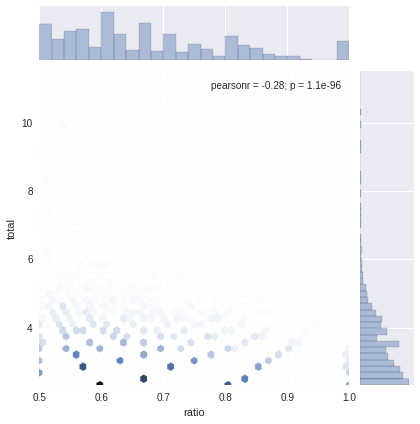

In [128]:
all_num_plus_plot = all_num_plus[(all_num_plus["total"] > 2)]
print all_num_plus_plot.shape[0]
sns.jointplot(x="ratio", y="total", data=all_num_plus_plot, kind="hex")

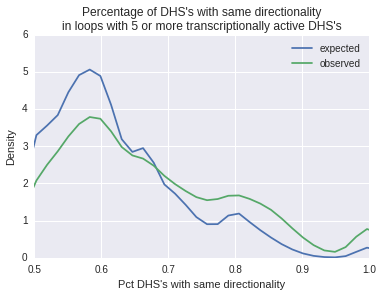

In [150]:
all_num_plus_sim_plot = all_num_plus_sim[(all_num_plus_sim["total"] > 2)]
sns.distplot(all_num_plus_sim_plot["ratio"], label="expected", hist=False)
sns.distplot(all_num_plus_plot["ratio"], label="observed", hist=False)
sns.plt.xlim([0.5,1])
sns.plt.xlabel("Pct DHS's with same directionality")
sns.plt.ylabel("Density")
sns.plt.title("Percentage of DHS's with same directionality\nin loops with 5 or more transcriptionally active DHS's")

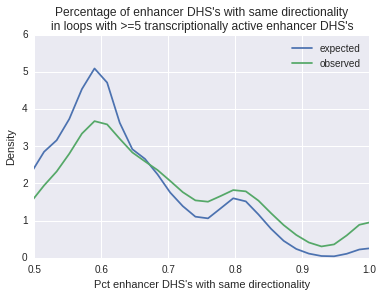

In [193]:
all_enh_plus_plot = all_enh_plus[(all_enh_plus["total"] > 2)]
all_enh_plus_sim_plot = all_enh_plus_sim[(all_enh_plus_sim["total"] > 2)]
sns.distplot(all_enh_plus_sim_plot["ratio"], label="expected", hist=False)
sns.distplot(all_enh_plus_plot["ratio"], label="observed", hist=False)
sns.plt.xlim([0.5,1])
sns.plt.xlabel("Pct enhancer DHS's with same directionality")
sns.plt.ylabel("Density")
sns.plt.title("Percentage of enhancer DHS's with same directionality\nin loops with >=5 transcriptionally active enhancer DHS's")

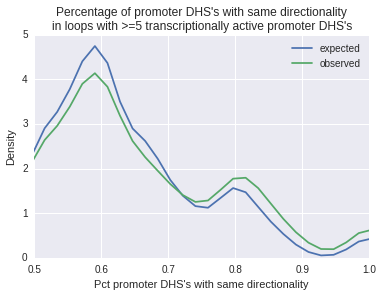

In [190]:
all_prom_plus_plot = all_prom_plus[(all_prom_plus["total"] > 2)]
all_prom_plus_sim_plot = all_prom_plus_sim[(all_prom_plus_sim["total"] > 2)]
sns.distplot(all_prom_plus_sim_plot["ratio"], label="expected", hist=False)
sns.distplot(all_prom_plus_plot["ratio"], label="observed", hist=False)
sns.plt.xlim([0.5,1])
sns.plt.xlabel("Pct promoter DHS's with same directionality")
sns.plt.ylabel("Density")
sns.plt.title("Percentage of promoter DHS's with same directionality\nin loops with >=5 transcriptionally active promoter DHS's")

Thus, within a loop, DHS's are slightly more likely to be the same direction than by chance, and most of this is driven by enhancers being in the same direction as opposed to promoters being in the same direction.

What about neighboring loops? If loops synchronize direction, then neighboring (non-overlapping) loops should not be expected to have similar directions either.

In [195]:
overall_direc = []
for loop in loop_to_dhs:
    dhs_list = loop_to_dhs[loop]
    p = m = 0
    
    for dhs in dhs_list:
        if dhs[4] == '0': continue
        if dhs[5] == '+': p += 1
        else: m += 1
            
    if p > m: overall_direc.append('p')
    elif p < m: overall_direc.append('m')
    else: overall_direc.append('s')                

In [199]:
# stretches of m's or p's
# todo: include 's' in there; but this probably won't change anything
m_stretch = []
p_stretch = []
ctr = 1
curr = 'x'
for dhs in overall_direc:
    if dhs == curr:
        ctr += 1
    else: 
        if curr == 'm': m_stretch.append(ctr)
        elif curr == 'p': p_stretch.append(ctr)
        curr = dhs
        ctr = 1        

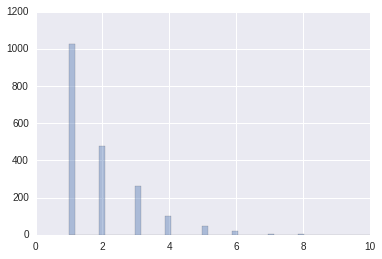

In [203]:
sns.distplot(m_stretch, kde=False)

Compared to chance??

In [211]:
print overall_direc.count("m"), overall_direc.count("p"), overall_direc.count("s")

3614 3336 1019


In [213]:
randsamp = ["m"] * overall_direc.count("m")
randsamp.extend(["p"] * overall_direc.count("p"))
randsamp.extend(["s"] * overall_direc.count("s"))

m_sample_stretch = {}
p_sample_stretch = {}
for i in range(50):
    perm = np.random.permutation(randsamp)
    m_stretch = []
    p_stretch = []
    ctr = 1
    curr = 'x'
    for dhs in perm:
        if dhs == curr:
            ctr += 1
        else: 
            if curr == 'm': m_stretch.append(ctr)
            elif curr == 'p': p_stretch.append(ctr)
            curr = dhs
            ctr = 1
    m_sample_stretch[i] = m_stretch
    p_sample_stretch[i] = p_stretch

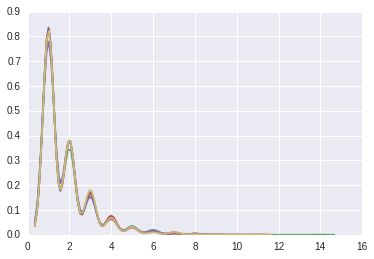

In [222]:
sns.distplot(m_stretch, hist=False)
sns.distplot(m_sample_stretch[1], hist=False)
sns.distplot(m_sample_stretch[2], hist=False)
sns.distplot(m_sample_stretch[3], hist=False)
sns.distplot(m_sample_stretch[4], hist=False)

Thus, directionality is not synchronized across neighboring loops (compared to chance).

Relationship between enhancers and promoters inside loops

(0, 20)

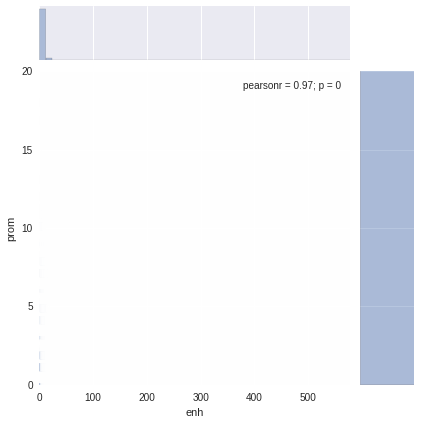

In [158]:
num_enh_prom = pd.DataFrame(np.zeros((len(loop_to_dhs.keys()),2)), columns=["enh", "prom"])
ctr = 0
for loop in loop_to_dhs:
    dhs_list = loop_to_dhs[loop]
    enh = 0
    prom = 0
    
    for dhs in loop_to_dhs[loop]:
        if 'enhancer' in dhs[3].lower(): enh += 1
        if 'promoter' in dhs[3].lower(): prom += 1
            
    num_enh_prom.ix[ctr,:] = [enh, prom]
    ctr += 1
sns.jointplot(x="enh", y="prom", data=num_enh_prom, kind="hex")
sns.plt.xlim([0,20])
sns.plt.ylim([0,20])

(0, 20)

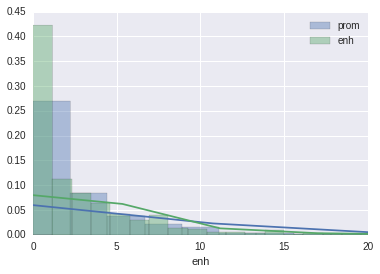

In [169]:
sns.distplot(num_enh_prom["prom"], bins=500, label="prom")
sns.distplot(num_enh_prom["enh"], bins=500, label="enh")
sns.plt.legend()
sns.plt.xlim([0, 20])

In [157]:
"ABC".lower()

'abc'

In [156]:
num_enh_prom.shape

(7969, 2)

Do the probability plot for distances - are things that are closer more likely to be same direction?

In [172]:
a = b = c = 0
a = 5
b = 6
c = 7
print a, b, c

5 6 7
